# Data Exploration (8 points):

Each item is worth 2 points.

For each question that asks to implement a function, implement it in the top cell where it is defined and then execute the function in the code cell provided below the question. <br>
You should base your answers on the output.<br>
You are allowed to implement and use additional functions. These would be defined and implemented in the
cell directly below the questions they were implemented for.

All the textual answers should be based on and justified with output from the data in the code cell above.<br>
For example, if the question asks about the correlation value, the code calculating it should appear above the answer, and the value should be in the output.
The answers should be concise and written in your own words.

### <span style="color:red">Do Not Modify the Structure of this Notebook, don't add/remove/move cells or change their type (Code/Markdown) </span>

1. [Implement the function `print_df_summary(df)`, then read the feather file 'TrainQuestionsDF.feather.zstd'<br> into a pandas dataframe and print its summary using the implemented function](#q1)
<br><br>
2. [We intend to predict the label for each sample, check if the data is balanced, or are there certain labels that are more common than others? <br>Justify you answer with an output from the data](#q2)
<br><br>
3. [Implement the functions `select_numeric_non_id_columns(df)` and `plot_pairwise_relationships(df)`, then generate a plot of the pairwise relationships between all the numerical columns in the dataset, excluding the id columns. <br>Which are the two most correlated columns, and what is the Pearson correlation coefficient between them?](#q3)
<br><br>
4. [Implement the function `plot_central_tendency_per_label(df, column)`, then select one of the numerical columns and generate the plot for it. What can you conclude from it?](#q4)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# TODO: Any additional (if needed) import statements should be in this cell
import pyarrow.feather as feather
import scipy as sp
from pandas.plotting import scatter_matrix

In [3]:
# TODO: Set the random seed as your student id (only numbers)
RANDOM_SEED = 3891013
np.random.seed(RANDOM_SEED)

In [4]:
# This cell is for functions given to you to use

def read_feather_to_df(feather_file_name):
    """
    The function expects to receive a path to feather file,
    it will read the file from the disk into a pandas dataframe
    :param feather_file_name: a string or path like object
    :return: pd.DataFrame
    """
    feather.read_feather(feather_file_name)
    return pd.read_feather(feather_file_name)

In [5]:
# This cell is for all the functions you are expected to implement.
# You should implement them here and only call them below when they are mentioned in a question.

def print_df_summary(df):
    """
    This function will print a short summary of a df in the following format:
        Number of samples (rows): <number>
        Number of features (columns): <number>
        The column names and dtypes: <column names> <column dtype>
    :param df: pd.DataFrame
    """
    # TODO: write your code here
    print("Number of samples (rows): ", df.shape[0])
    print("Number of features (columns): ", df.shape[1])
    print("The column names and dtypes: ")
    for x in df:
        print(x, " ", df[x].dtypes)
    pass


def select_numeric_non_id_columns(df):
    """
    Return a subset of a DataFrame’s columns based on the column dtypes,
    including only numerical columns and excluding columns with the string id (case-insensitive) in their name
    :param df: pd.DataFrame
    :return: pd.DataFrame
    """
    numerical_df = pd.DataFrame()
    # TODO: write your code here
    for x in df:
        c = df[x].dtypes
        if c == "Int64":
            if x != "Id" and x != "PostTypeId" and x != "AcceptedAnswerId" and x != "OwnerUserId" and x != "LastEditorUserId" and x != "ParentId":
               numerical_df[x] = df[x]   
    return numerical_df


def plot_pairwise_relationships(df):
    """
    Plot pairwise relationships between all numerical columns
    :param df: pd.DataFrame
    """
    # TODO: write your code here
    columns = []
    for x in df:
       columns.append(x)
    
    count = 0
    for i in range(len(columns)-1):
        j = len(columns) - 1
        while j > i:
            ax = sns.scatterplot(x = df[columns[i]], y = df[columns[j]], data = df)
            g = plt.figure(figsize=(12,12))
            rho = np.round( sp.stats.pearsonr(df[columns[i]],df[columns[j]])[0]  ,2)
            ax.annotate (r"$\rho$: {}".format(rho), xy=(.8, .8), xycoords='axes fraction',  bbox=dict(lw = 1, ec = "#555555", fc = "white"),fontsize=13 ) 
            plt.show()
            count = count + 1
            j = j-1
            


def plot_central_tendency_per_label(df, column):
    """
    Plot point estimates for the given column of the mean, per label.
    On the y-axis the values of the given column, and on the x-axis all the labels.
    The plot can be a point plot, bar plot, or similar.
    The labels on the x-axis should be in decreasing order of their point estimates,
    and all labels are on the plot are readable (e.g. not overlapping or too small)
    :param df: pd.DataFrame
    :param column: string, a name of a column in the df
    """
    # TODO: write your code here
    fig = plt. figure (figsize=(10,8))
    df_agg = df.groupby(['Label']).agg ('mean').reset_index().sort_values(column, ascending=False)
    ax = sns.pointplot(x="Label", y=column, data=df, order=df_agg['Label'])
    plt.grid()

### <a name="q1"></a> 1. Implement the function `print_df_summary(df)`, then read the feather file 'TrainQuestionsDF.feather.zstd' into a pandas dataframe and print its summary using the implemented function

In [6]:
# TODO: write your function calls and code here
data_df = read_feather_to_df("TrainQuestionsDF.feather.zstd")
print_df_summary(data_df)
# You are expected to replace "pass" with your code and function calls for example:
# data_df = read_feather_to_df(TrainQuestionsDF.feather.zstd)
# print_df_summary(data_df)

Number of samples (rows):  21011
Number of features (columns):  21
The column names and dtypes: 
Id   Int64
PostTypeId   Int64
AcceptedAnswerId   Int64
CreationDate   datetime64[ns]
Score   Int64
ViewCount   Int64
Body   string
OwnerUserId   Int64
LastActivityDate   datetime64[ns]
Title   string
AnswerCount   Int64
CommentCount   Int64
FavoriteCount   Int64
LastEditorDisplayName   string
LastEditDate   datetime64[ns]
LastEditorUserId   Int64
CommunityOwnedDate   datetime64[ns]
ParentId   Int64
ClosedDate   datetime64[ns]
OwnerDisplayName   string
Label   object


### <a name="q2"></a> 2. We intend to predict the label for each sample, check if the data is balanced, or are there certain labels that are more common than others? <br>Justify you answer with an output from the data

In [7]:
# TODO: write your function calls and code here
print(data_df["Label"].value_counts())
# as we have used function called "count_unique_values_in_data" which counts and displays all the unique occurences of 
# a data within a column. Here, we can see that there are 7 unique label which occur almost equally within the data.
# Thus, we can conclude that data is balanced. 

bayesian              3002
distributions         3002
hypothesis-testing    3002
probability           3002
time-series           3001
logistic              3001
self-study            3001
Name: Label, dtype: int64


*Write your answer to 2 here (1-2 sentences):*<br><b>
As we have used 'value_counts()' which counts and displays all the unique occurences of a data within a column. Here, we can see that there are 7 unique label which occur almost equally(either 3002 or 3001 times) within the data.
Thus, we can conclude that data is balanced. 


### <a name="q3"></a> 3. Implement the functions `select_numeric_non_id_columns(df)` and `plot_pairwise_relationships(df)`, then generate a plot of the pairwise relationships between all the numerical columns in the dataset, excluding the id columns. <br>3.1 Which are the two most correlated columns? <br>3.2 What is the Pearson correlation coefficient between them?

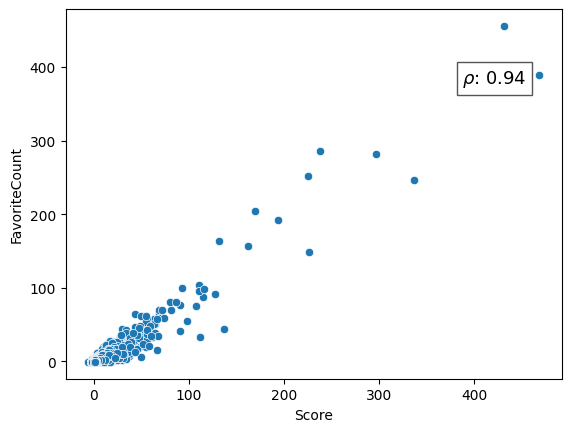

<Figure size 1200x1200 with 0 Axes>

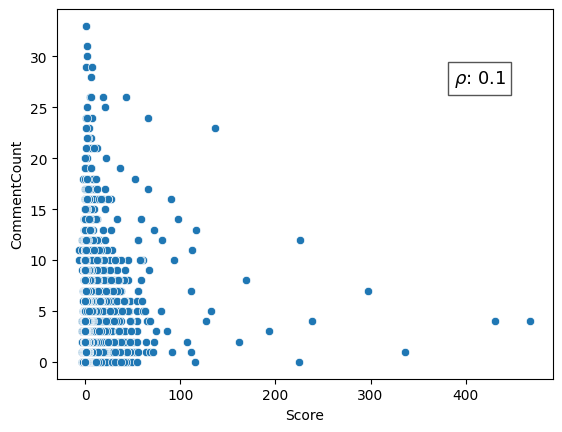

<Figure size 1200x1200 with 0 Axes>

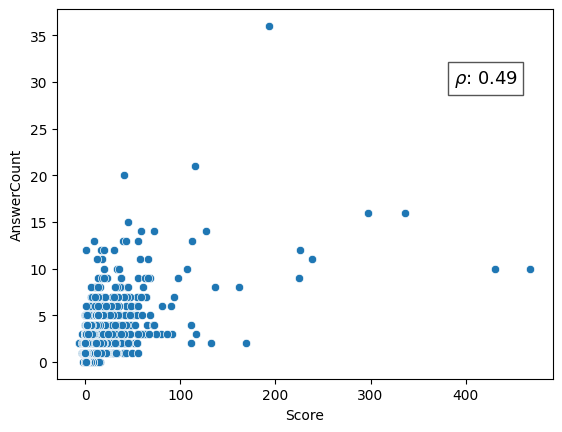

<Figure size 1200x1200 with 0 Axes>

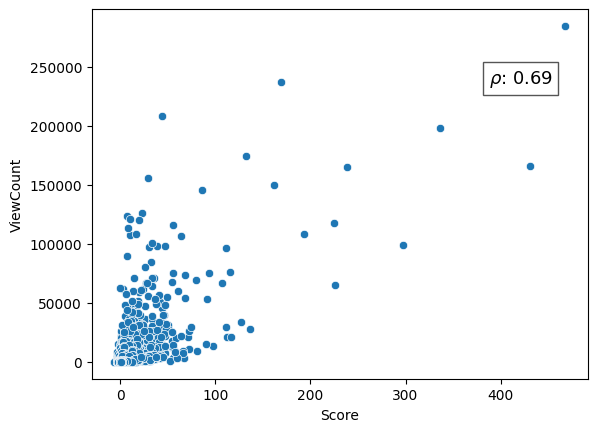

<Figure size 1200x1200 with 0 Axes>

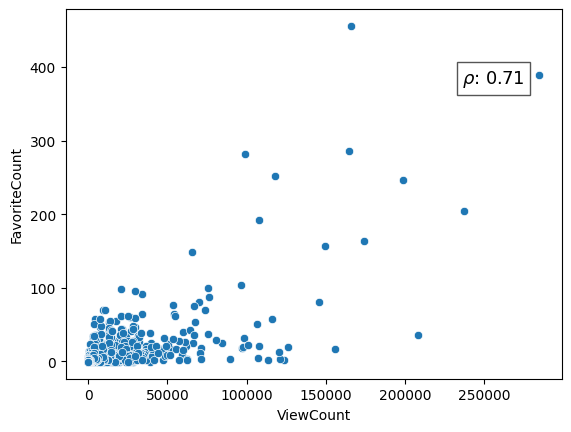

<Figure size 1200x1200 with 0 Axes>

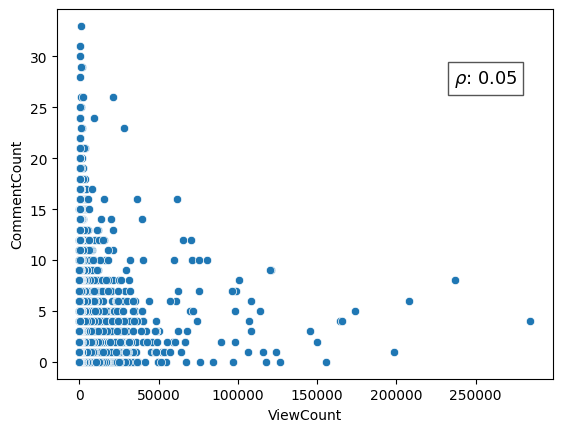

<Figure size 1200x1200 with 0 Axes>

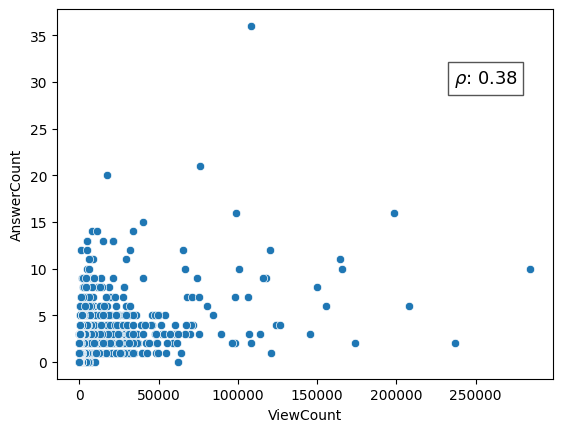

<Figure size 1200x1200 with 0 Axes>

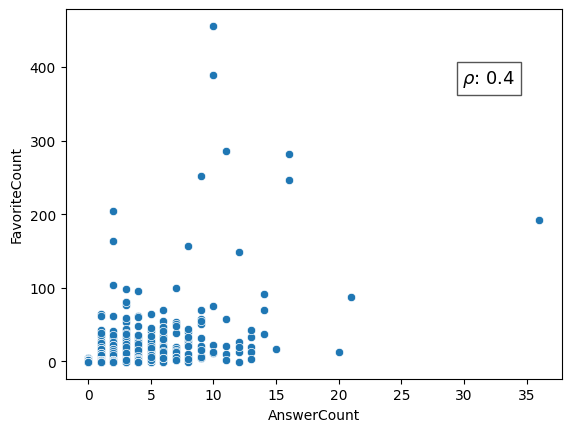

<Figure size 1200x1200 with 0 Axes>

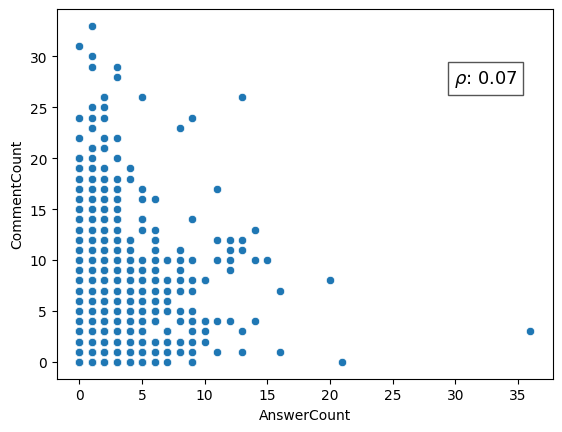

<Figure size 1200x1200 with 0 Axes>

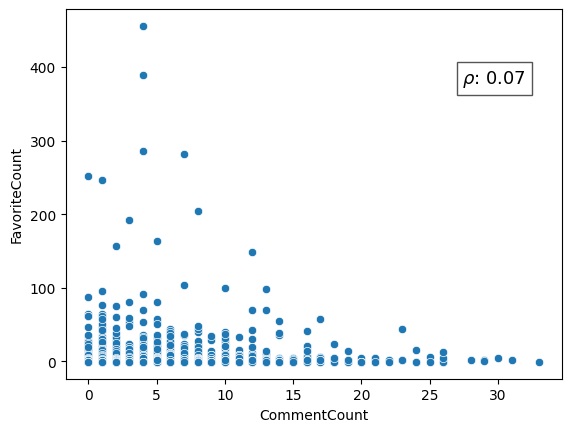

<Figure size 1200x1200 with 0 Axes>

In [8]:
# TODO: write your function calls and code here
non_numeric_df = select_numeric_non_id_columns(data_df)
(plot_pairwise_relationships(non_numeric_df))

*Write your answers to 3 here (1-2 sentences per item):*<br>
<b>
    3.1) The most correlated columns are "FavoriteCount" and "Score" columns<br>
    3.2) The pearson coefficient between "FavoriteCount" and "Score" is 0.94

### <a name="q4"></a> 4. Implement the function `plot_central_tendency_per_label(df, column)`, then select one of the numerical columns and generate the plot for it. <br>What can you conclude from it?

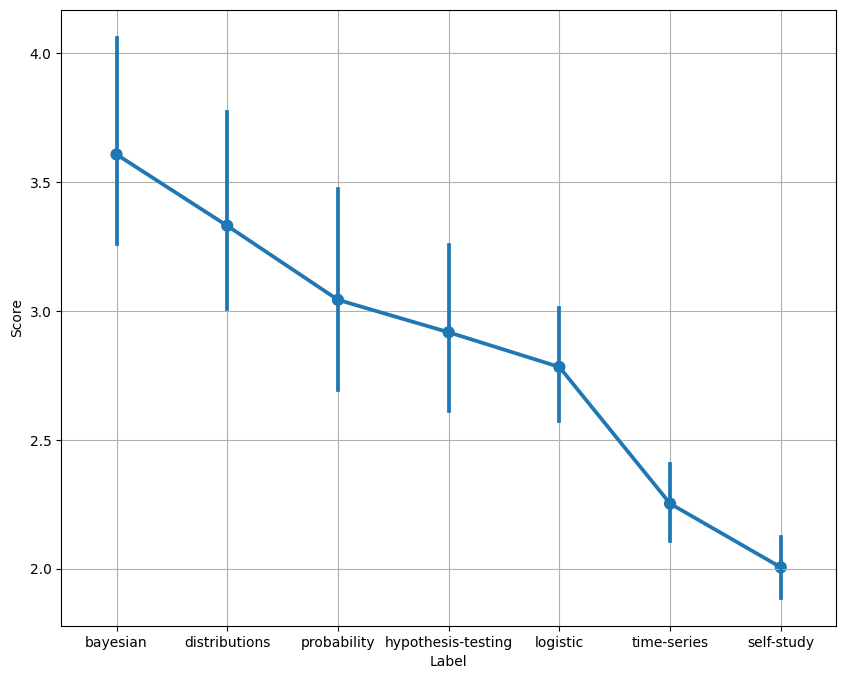

In [9]:
# TODO: write your function calls and code here
plot_central_tendency_per_label(data_df, 'Score')

*Write your answer to 4 here (up to 4 sentences):*<br>
For the 'Score' columns, the mean score for the label 'bayesian'is highest at 3.6 whereas for the label 'self-study' is lowest around 2.0
<br>
Besides that, for the label 'distributions', the mean is second highest that is equal to 3.4<br>
Fro the label 'probability', the mean is third highest that is equal to 3.1